# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.10.0-omicron.new.269.319.322.330.fix.291.307.309.328'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Please set verbose=2 to see the detailed citation list.




### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
329522,2020-11-10,855,827,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329523,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329524,2020-11-12,856,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329525,2020-11-13,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329526,2020-11-14,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
329522,2020-11-10,Colombia,Vichada,855,17,11,827
329523,2020-11-11,Colombia,Vichada,856,17,11,828
329524,2020-11-12,Colombia,Vichada,856,14,11,831
329525,2020-11-13,Colombia,Vichada,856,13,11,832
329526,2020-11-14,Colombia,Vichada,856,13,11,832


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
236,2020-11-10,33060,2416,465,30179
237,2020-11-11,33377,2449,468,30460
238,2020-11-12,33770,2617,470,30683
239,2020-11-13,34144,2720,470,30954
240,2020-11-14,34496,2841,470,31185


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-11-10,51551091,16709259,1278712,33563120,0.012402,0.325533,0.036700
2020-11-11,52186160,17045350,1288835,33851975,0.012348,0.324339,0.036676
2020-11-12,52807125,17416680,1297886,34092559,0.012289,0.322803,0.036673
2020-11-13,53423087,17740245,1307011,34375831,0.012233,0.321732,0.036629
2020-11-14,53431247,17747326,1307105,34376816,0.012232,0.321692,0.036630


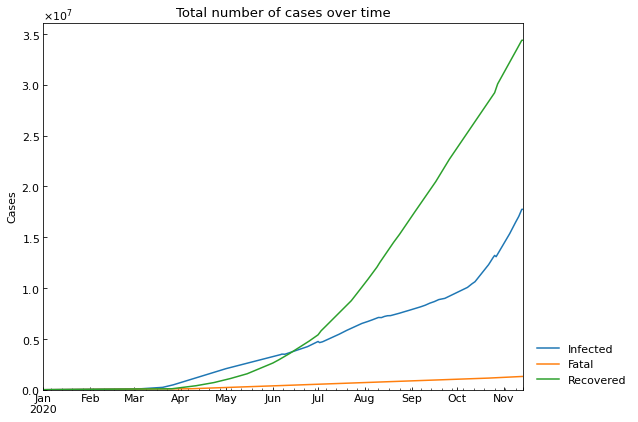

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
275,2020-11-10,110505,10405,1850,98250
276,2020-11-11,112049,11104,1862,99083
277,2020-11-12,113711,11857,1872,99982
278,2020-11-13,115413,12534,1884,100995
279,2020-11-14,117150,13298,1887,101965


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
273,2020-11-10,108983,8880,1829,98274
274,2020-11-11,110156,9207,1841,99108
275,2020-11-12,111711,9855,1851,100005
276,2020-11-13,113298,10413,1867,101018
277,2020-11-14,114983,11114,1880,101989


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
329522,2020-11-10,855,827,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329523,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329524,2020-11-12,856,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329525,2020-11-13,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329526,2020-11-14,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
277844,COL,Colombia,Vichada,2020-11-10,107808
277845,COL,Colombia,Vichada,2020-11-11,107808
277846,COL,Colombia,Vichada,2020-11-12,107808
277847,COL,Colombia,Vichada,2020-11-13,107808
277848,COL,Colombia,Vichada,2020-11-14,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
329522,2020-11-10,855,827,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329523,2020-11-11,856,828,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329524,2020-11-12,856,831,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329525,2020-11-13,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
329526,2020-11-14,856,832,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
329522,2020-11-10,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
329523,2020-11-11,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
329524,2020-11-12,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
329525,2020-11-13,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
329526,2020-11-14,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
314,2020-11-10,1,1,1,0,0,1,1,3,2,2,1,38.89
315,2020-11-11,1,1,1,0,0,1,1,3,2,2,1,38.89
316,2020-11-12,1,1,1,0,0,1,1,3,2,2,1,38.89
317,2020-11-13,1,1,1,0,0,1,1,3,2,2,1,38.89
318,2020-11-14,1,1,1,0,0,1,1,3,2,2,1,38.89


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
314,2020-11-10,1,1,1,0,0,1,1,3,2,2,1,38.89
315,2020-11-11,1,1,1,0,0,1,1,3,2,2,1,38.89
316,2020-11-12,1,1,1,0,0,1,1,3,2,2,1,38.89
317,2020-11-13,1,1,1,0,0,1,1,3,2,2,1,38.89
318,2020-11-14,1,1,1,0,0,1,1,3,2,2,1,38.89


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

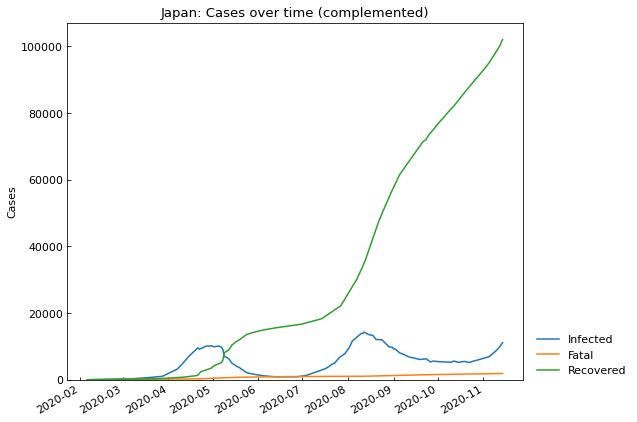

,Date,Confirmed,Infected,Fatal,Recovered
273,2020-11-10,108983,8880,1829,98274
274,2020-11-11,110156,9207,1841,99108
275,2020-11-12,111711,9855,1851,100005
276,2020-11-13,113298,10413,1867,101018
277,2020-11-14,114983,11114,1880,101989


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

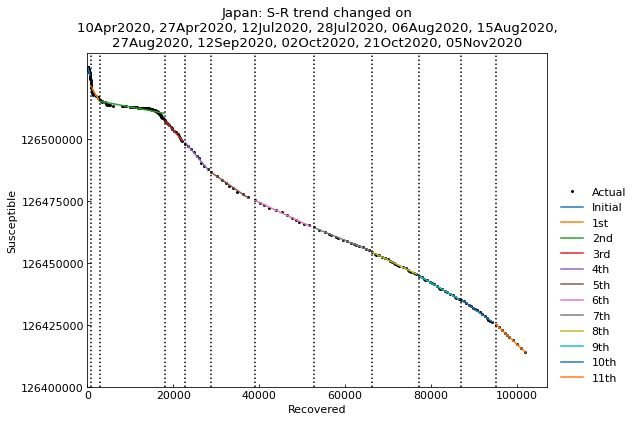

,Type,Start,End,Population
0th,Past,06Feb2020,09Apr2020,126529100
1st,Past,10Apr2020,26Apr2020,126529100
2nd,Past,27Apr2020,11Jul2020,126529100
3rd,Past,12Jul2020,27Jul2020,126529100
4th,Past,28Jul2020,05Aug2020,126529100
5th,Past,06Aug2020,14Aug2020,126529100
6th,Past,15Aug2020,26Aug2020,126529100
7th,Past,27Aug2020,11Sep2020,126529100
8th,Past,12Sep2020,01Oct2020,126529100
9th,Past,02Oct2020,20Oct2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (05Nov2020 - 14Nov2020): finished 1204 trials in 0 min 40 sec


	 3rd phase (12Jul2020 - 27Jul2020): finished  374 trials in 0 min 10 sec

	 4th phase (28Jul2020 - 05Aug2020): finished  694 trials in 0 min 20 sec

	 5th phase (06Aug2020 - 14Aug2020): finished  970 trials in 0 min 30 sec

	 6th phase (15Aug2020 - 26Aug2020): finished  346 trials in 0 min 10 sec

	 7th phase (27Aug2020 - 11Sep2020): finished  367 trials in 0 min 10 sec

	 8th phase (12Sep2020 - 01Oct2020): finished  682 trials in 0 min 20 sec

	 2nd phase (27Apr2020 - 11Jul2020): finished 3662 trials in 3 min  0 sec

	 0th phase (06Feb2020 - 09Apr2020): finished 3669 trials in 3 min  0 sec

	 1st phase (10Apr2020 - 26Apr2020): finished 3701 trials in 3 min  0 sec

	10th phase (21Oct2020 - 04Nov2020): finished  696 trials in 0 min 20 sec

	 9th phase (02Oct2020 - 20Oct2020): finished 3712 trials in 3 min  0 sec

Completed optimization. Total: 5 min 22 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/gamma [day],1/alpha2 [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,09Apr2020,126529100,SIR-F,4.18,0.018052,0.000473,0.054430,0.012315,720,0.018,40,1056,9,0.240348,3669,3 min 0 sec
1st,Past,10Apr2020,26Apr2020,126529100,SIR-F,5.47,0.017454,0.000309,0.034331,0.005854,720,0.017,85,1619,14,0.153908,3701,3 min 0 sec
2nd,Past,27Apr2020,11Jul2020,126529100,SIR-F,0.34,0.080303,0.000446,0.010713,0.028837,720,0.080,17,1122,46,0.307231,3662,3 min 0 sec
3rd,Past,12Jul2020,27Jul2020,126529100,SIR-F,2.16,0.000634,0.000150,0.062940,0.028965,720,0.001,17,3325,7,0.021514,374,0 min 10 sec
4th,Past,28Jul2020,05Aug2020,126529100,SIR-F,1.86,0.000157,0.000060,0.070949,0.037983,720,0.000,13,8355,7,0.018021,694,0 min 20 sec
5th,Past,06Aug2020,14Aug2020,126529100,SIR-F,1.27,0.000739,0.000225,0.047952,0.037504,720,0.001,13,2220,10,0.017800,970,0 min 30 sec
6th,Past,15Aug2020,26Aug2020,126529100,SIR-F,0.74,0.000488,0.000526,0.035616,0.047785,720,0.000,10,950,14,0.034779,346,0 min 10 sec
7th,Past,27Aug2020,11Sep2020,126529100,SIR-F,0.70,0.018035,0.000070,0.034438,0.048228,720,0.018,10,7134,14,0.010606,367,0 min 10 sec
8th,Past,12Sep2020,01Oct2020,126529100,SIR-F,0.86,0.000808,0.000737,0.040588,0.046175,720,0.001,10,678,12,0.018881,682,0 min 20 sec
9th,Past,02Oct2020,20Oct2020,126529100,SIR-F,0.99,0.000740,0.000452,0.048808,0.048609,720,0.001,10,1107,10,0.012253,3712,3 min 0 sec


### Accuracy of estimation

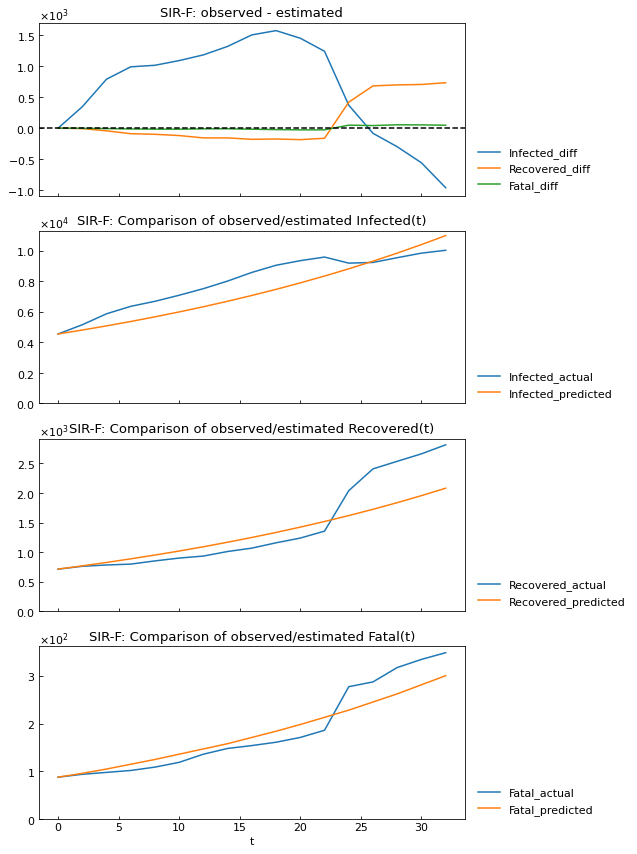

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

1.86

### Show parameter history

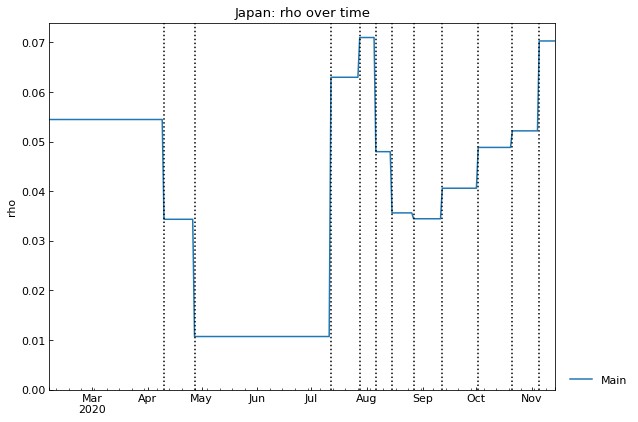

In [32]:
_ = snl.history(target="rho")

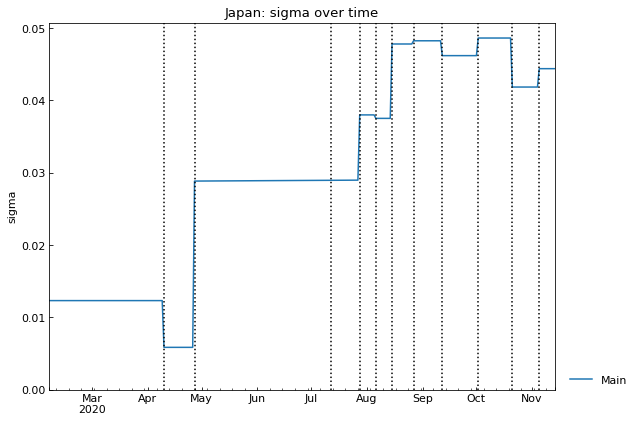

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

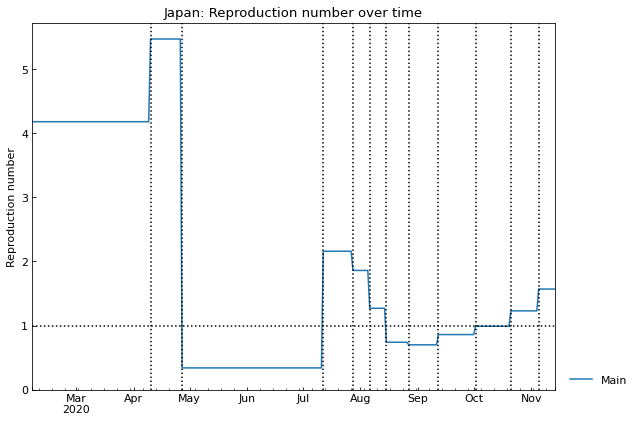

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

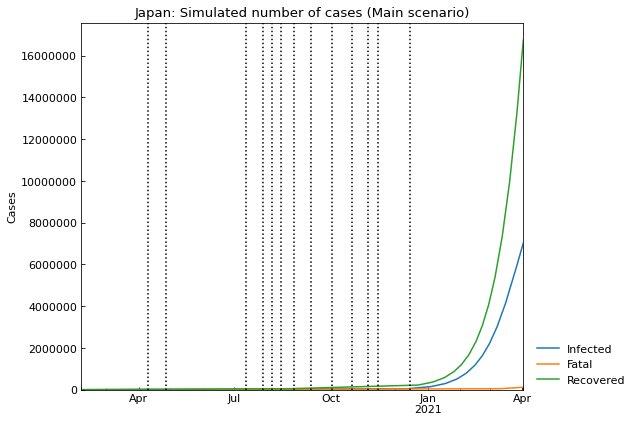

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,20801543,100711,6321675,14379157
418,2021-03-30,21551486,104568,6498861,14948057
419,2021-03-31,22316580,108525,6675410,15532645
420,2021-04-01,23096321,112582,6850887,16132852
421,2021-04-02,23890150,116736,7024840,16748574


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.04437381136379283

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.08874762272758566

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  09Apr2020   126529100  SIR-F  4.18   
         1st      Past  10Apr2020  26Apr2020   126529100  SIR-F  5.47   
         2nd      Past  27Apr2020  11Jul2020   126529100  SIR-F  0.34   
         3rd      Past  12Jul2020  27Jul2020   126529100  SIR-F  2.16   
         4th      Past  28Jul2020  05Aug2020   126529100  SIR-F  1.86   
         5th      Past  06Aug2020  14Aug2020   126529100  SIR-F  1.27   
         6th      Past  15Aug2020  26Aug2020   126529100  SIR-F  0.74   
         7th      Past  27Aug2020  11Sep2020   126529100  SIR-F  0.70   
         8th      Past  12Sep2020  01Oct2020   126529100  SIR-F  0.86   
         9th      Past  02Oct2020  20Oct2020   126529100  SIR-F  0.99   
         10th     Past  21Oct2020  04Nov2020   126529100  SIR-F  1.23   
         11th     Past  05Nov2020  14Nov2020   126529100  SIR-F  1.57   
         12th   Future  15Nov2020  14Dec2020   126529100  SIR-F  1.57   
         13th   Future  15Dec2020  01Apr2021   126529100  SIR-F  1.57   
Medicine 0th      Past  06Feb2020  09Apr2020   126529100  SIR-F  4.18   
         1st      Past  10Apr2020  26Apr2020   126529100  SIR-F  5.47   
         2nd      Past  27Apr2020  11Jul2020   126529100  SIR-F  0.34   
         3rd      Past  12Jul2020  27Jul2020   126529100  SIR-F  2.16   
         4th      Past  28Jul2020  05Aug2020   126529100  SIR-F  1.86   
         5th      Past  06Aug2020  14Aug2020   126529100  SIR-F  1.27   
         6th      Past  15Aug2020  26Aug2020   126529100  SIR-F  0.74   
         7th      Past  27Aug2020  11Sep2020   126529100  SIR-F  0.70   
         8th      Past  12Sep2020  01Oct2020   126529100  SIR-F  0.86   
         9th      Past  02Oct2020  20Oct2020   126529100  SIR-F  0.99   
         10th     Past  21Oct2020  04Nov2020   126529100  SIR-F  1.23   
         11th     Past  05Nov2020  14Nov2020   126529100  SIR-F  1.57   
         12th   Future  15Nov2020  14Dec2020   126529100  SIR-F  1.57   
         13th   Future  15Dec2020  01Apr2021   126529100  SIR-F  0.79   

                   theta     kappa       rho     sigma  tau  alpha1 [-]  \
Scenario Phase                                                            
Main     0th    0.018052  0.000473  0.054430  0.012315  720       0.018   
         1st    0.017454  0.000309  0.034331  0.005854  720       0.017   
         2nd    0.080303  0.000446  0.010713  0.028837  720       0.080   
         3rd    0.000634  0.000150  0.062940  0.028965  720       0.001   
         4th    0.000157  0.000060  0.070949  0.037983  720       0.000   
         5th    0.000739  0.000225  0.047952  0.037504  720       0.001   
         6th    0.000488  0.000526  0.035616  0.047785  720       0.000   
         7th    0.018035  0.000070  0.034438  0.048228  720       0.018   
         8th    0.000808  0.000737  0.040588  0.046175  720       0.001   
         9th    0.000740  0.000452  0.048808  0.048609  720       0.001   
         10th   0.000172  0.000619  0.052143  0.041834  720       0.000   
         11th   0.001112  0.000236  0.070254  0.044374  720       0.001   
         12th   0.001112  0.000236  0.070254  0.044374  720       0.001   
         13th   0.001112  0.000236  0.070254  0.044374  720       0.001   
Medicine 0th    0.018052  0.000473  0.054430  0.012315  720       0.018   
         1st    0.017454  0.000309  0.034331  0.005854  720       0.017   
         2nd    0.080303  0.000446  0.010713  0.028837  720       0.080   
         3rd    0.000634  0.000150  0.062940  0.028965  720       0.001   
         4th    0.000157  0.000060  0.070949  0.037983  720       0.000   
         5th    0.000739  0.000225  0.047952  0.037504  720       0.001   
         6th    0.000488  0.000526  0.035616  0.047785  720       0.000   
         7th    0.018035  0.000070  0.034438  0.048228  720       0.018   
         8th    0.000808  0

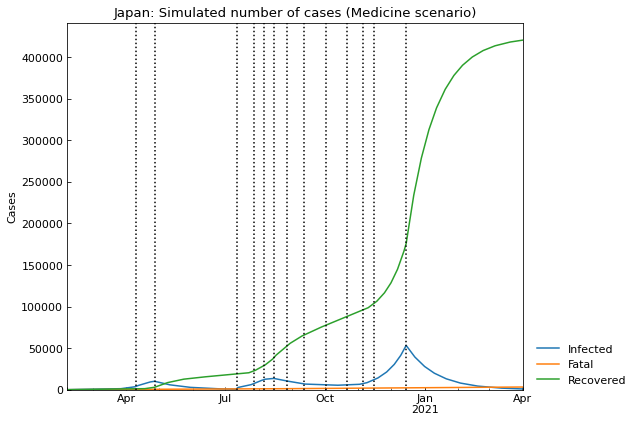

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,424039,3228,1023,419788
418,2021-03-30,424178,3228,984,419966
419,2021-03-31,424314,3229,948,420137
420,2021-04-01,424443,3229,912,420302
421,2021-04-02,424569,3230,878,420461


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,7024840,02Apr2021,23890150,7024840,116736,1.57
Medicine,53236,15Dec2020,424569,878,3230,0.79


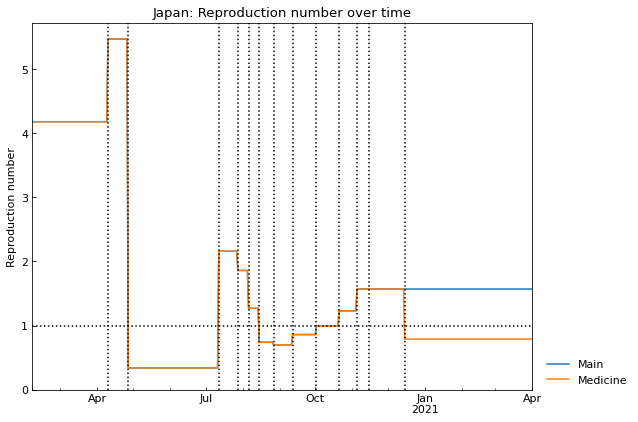

In [41]:
_ = snl.history(target="Rt")

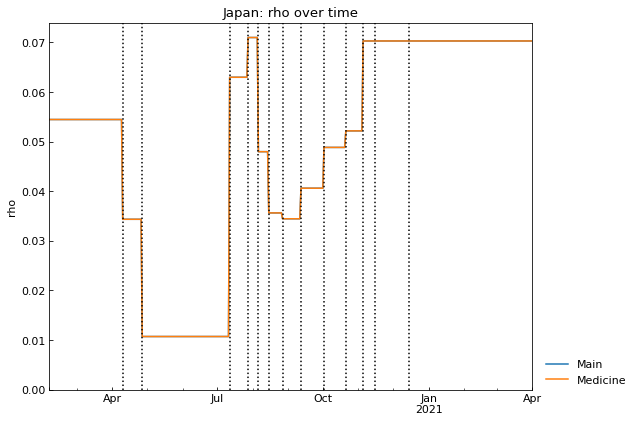

In [42]:
_ = snl.history(target="rho")

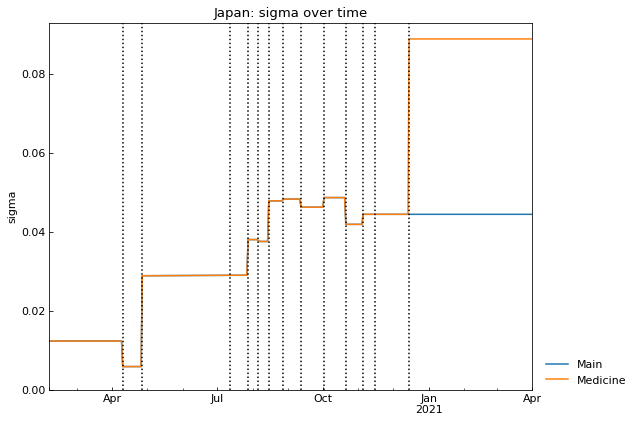

In [43]:
_ = snl.history(target="sigma")

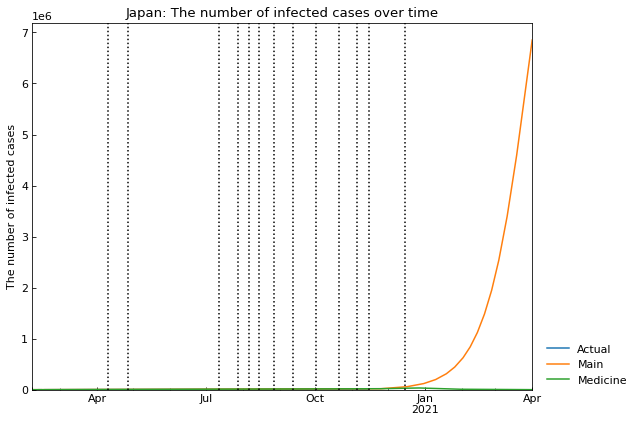

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

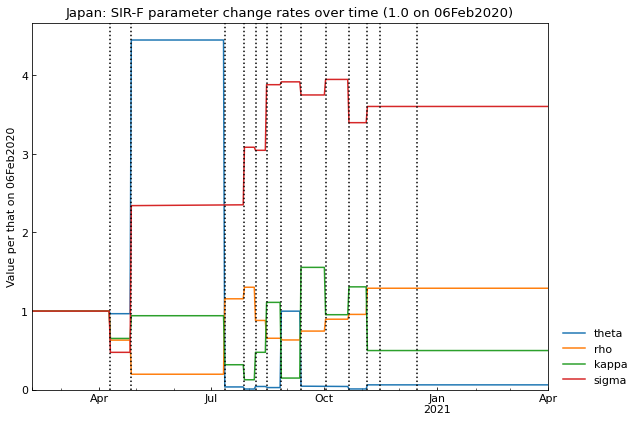

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (05Nov2020 - 14Nov2020): finished 1292 trials in 0 min 50 sec


	 3rd phase (12Jul2020 - 27Jul2020): finished  313 trials in 0 min 10 sec

	 4th phase (28Jul2020 - 05Aug2020): finished  773 trials in 0 min 30 sec

	 5th phase (06Aug2020 - 14Aug2020): finished  822 trials in 0 min 30 sec

	 6th phase (15Aug2020 - 26Aug2020): finished  268 trials in 0 min 10 sec

	 7th phase (27Aug2020 - 31Aug2020): finished  284 trials in 0 min 10 sec

	 8th phase (01Sep2020 - 11Sep2020): finished  306 trials in 0 min 10 sec

	 9th phase (12Sep2020 - 01Oct2020): finished  666 trials in 0 min 20 sec

	 1st phase (10Apr2020 - 26Apr2020): finished 3308 trials in 3 min  0 sec

	 0th phase (06Feb2020 - 09Apr2020): finished 3230 trials in 3 min  0 sec

	 2nd phase (27Apr2020 - 11Jul2020): finished 3225 trials in 3 min  0 sec

	11th phase (21Oct2020 - 04Nov2020): finished  706 trials in 0 min 20 sec

	10th phase (02Oct2020 - 20Oct2020): finished 3753 trials in 3 min  0 sec

Completed optimization. Total: 5 min 53 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 8th phase (01Sep2020 - 14Nov2020): finished 11170 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  09Apr2020  SIR-F  4.18  0.018052  0.000473   
              1st    10Apr2020  26Apr2020  SIR-F  5.47  0.017454  0.000309   
              2nd    27Apr2020  11Jul2020  SIR-F  0.34  0.080303  0.000446   
              3rd    12Jul2020  27Jul2020  SIR-F  2.16  0.000634  0.000150   
              4th    28Jul2020  05Aug2020  SIR-F  1.86  0.000157  0.000060   
              5th    06Aug2020  14Aug2020  SIR-F  1.25  0.000663  0.000254   
              6th    15Aug2020  26Aug2020  SIR-F  0.74  0.000488  0.000526   
              7th    27Aug2020  31Aug2020  SIR-F  0.77  0.000488  0.000526   
              8th    01Sep2020  11Sep2020  SIR-F  0.68  0.000354  0.000710   
              9th    12Sep2020  01Oct2020  SIR-F  0.86  0.000808  0.000737   
              10th   02Oct2020  20Oct2020  SIR-F  0.99  0.000740  0.000452   
              11th   21Oct2020  04Nov2020  SIR-F  1.23  0.000172  0.000619   
              12th   05Nov2020  14Nov2020  SIR-F  1.57  0.000927  0.000415   
Retrospective 0th    06Feb2020  09Apr2020  SIR-F  4.18  0.018052  0.000473   
              1st    10Apr2020  26Apr2020  SIR-F  5.47  0.017454  0.000309   
              2nd    27Apr2020  11Jul2020  SIR-F  0.34  0.080303  0.000446   
              3rd    12Jul2020  27Jul2020  SIR-F  2.16  0.000634  0.000150   
              4th    28Jul2020  05Aug2020  SIR-F  1.86  0.000157  0.000060   
              5th    06Aug2020  14Aug2020  SIR-F  1.25  0.000663  0.000254   
              6th    15Aug2020  26Aug2020  SIR-F  0.74  0.000488  0.000526   
              7th    27Aug2020  31Aug2020  SIR-F  0.77  0.000488  0.000526   
              8th    01Sep2020  14Nov2020  SIR-F  0.77  0.000488  0.000526   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.054430  0.012315  0.240348    3230  3 min  0 sec  
              1st    0.034331  0.005854  0.153908    3308  3 min  0 sec  
              2nd    0.010713  0.028837  0.307231    3225  3 min  0 sec  
              3rd    0.062940  0.028965  0.021514     313  0 min 10 sec  
              4th    0.070949  0.037983  0.018021     773  0 min 30 sec  
              5th    0.047872  0.037944  0.017830     822  0 min 30 sec  
              6th    0.035616  0.047785  0.034779     268  0 min 10 sec  
              7th    0.041855  0.053894  0.009138     284  0 min 10 sec  
              8th    0.034064  0.049696  0.013040     306  0 min 10 sec  
              9th    0.040588  0.046175  0.018881     666  0 min 20 sec  
              10th   0.048808  0.048609  0.012253    3753  3 min  0 sec  
              11th   0.052143  0.041834  0.013617     706  0 min 20 sec  
              12th   0.070494  0.044356  0.006250    1292  0 min 50 sec  
Retrospective 0th    0.054430  0.012315  0.240348    3230  3 min  0 sec  
              1st    0.034331  0.005854  0.153908    3308  3 min  0 sec  
              2nd    0.010713  0.028837  0.307231    3225  3 min  0 sec  
              3rd    0.062940  0.028965  0.021514     313  0 min 10 sec  
              4th    0.070949  0.037983  0.018021     773  0 min 30 sec  
              5th    0.047872  0.037944  0.017830     822  0 min 30 sec  
              6th    0.035616  0.047785  0.034779     268  0 min 10 sec  
              7th    0.041855  0.053894  0.009138     284  0 min 10 sec  
              8th    0.041855  0.053894  0.466043   11170  3 min  0 sec

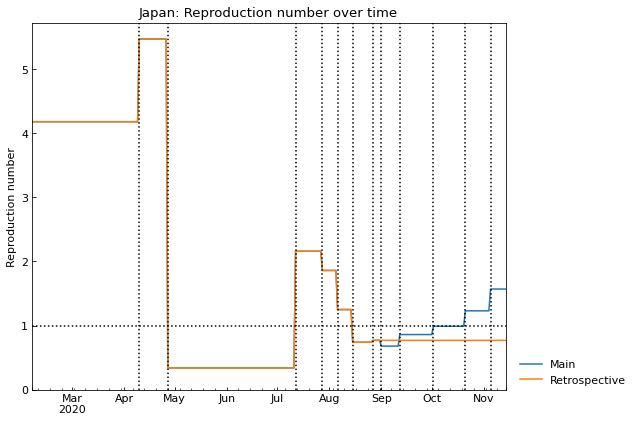

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

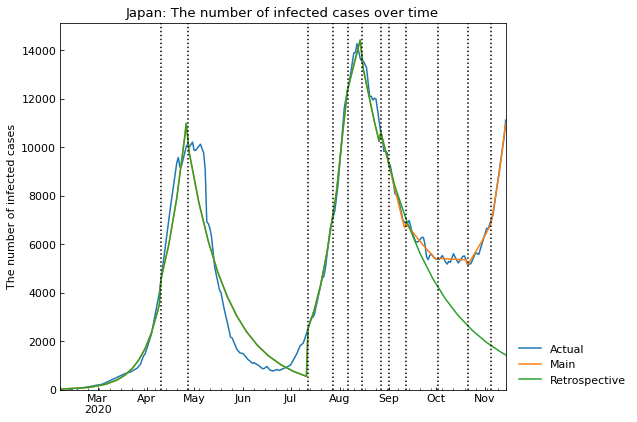

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 15Nov2020,Infected on 15Nov2020,Fatal on 15Nov2020,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,14418,14Aug2020,116588,11565,1881,0.68,0.86,0.99,1.23,1.57
Retrospective,14418,14Aug2020,94503,1400,1637,0.77,-,-,-,-
